## Q1 What proportion of students who answer this question quickly will pass the class? Assume the probability of passing the class is 0.9. Assume the probability of answering this question quickly is 0.6 if you'll pass the class, while the probability drops to 0.3 if you'll not pass the class.

$$
    P(Pass) = 0.9 \\
    P(Quick \mid Pass) = 0.6 \\
    P(Quick \mid Not Pass) = 0.3\\
    Want: P(Pass \mid Quick)
$$
Answer: 
$$
    P(Pass \mid Quick) = P(Quick \mid Pass) x P(Pass) / P(Quick)\\
                       = 0.6 x 0.9 / (0.6 x 0.9 + 0.3 x 0.1)\\
                       = 0.54 / (0.54 + 0.03) \\
                       = 0.9474
$$
Thus, about 94.74% of students who answer this question quickly will pass the class. 

## Q2

### Likelihood
$$
p(x \mid \theta, n) = \frac{n!}{x_1! x_2! \dots x_k!} \prod_{i=1}^k \theta_i^{x_i}
$$


### Prior
$$
p(\theta \mid \alpha) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1} 
$$
where $( B(\alpha) )$ is the normalization constant:
$$
B(\alpha) = \frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}
$$

### Posterior
$$
p(\theta \mid x, n, \alpha) = \frac{p(x \mid \theta, n) p(\theta \mid \alpha)}{p(x)} 
$$

where $( p(x) = \int p(x \mid \theta, n) p(\theta \mid \alpha) \, d\theta )$.

Expanding:
$$
p(\theta \mid x, n, \alpha) = \frac{n!}{x_1! x_2! \dots x_k!} \prod_{i=1}^k \theta_i^{x_i} 
\cdot \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}
$$

Combining terms:
$$
p(\theta \mid x, n, \alpha) = \frac{n!}{x_1! x_2! \dots x_k!} \cdot \frac{1}{B(\alpha)} 
\cdot \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1}
$$

### Simplification
The posterior is proportional to:
$$
p(\theta \mid x, n, \alpha) \propto \frac{1}{B(\alpha')} \prod_{i=1}^k \theta_i^{\alpha_i'}
$$

where $( \alpha_i' = \alpha_i + x_i )$ for $( i = 1, 2, \dots, k )$, so:
$$
\alpha' = (\alpha_1 + x_1, \alpha_2 + x_2, \dots, \alpha_k + x_k)
$$

### Conclusion
The posterior is a Dirichlet distribution:
$$
p(\theta \mid x, n, \alpha) \sim \text{Dirichlet}(\alpha' = \alpha + x)
$$


## Q3 Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

In [6]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Sample from 3 category multinomial distribution
p_multinomial = np.array([0.4, 0.35, 0.25])
multinomial_sample = stats.multinomial.rvs(n=100, p=p_multinomial, size = 1)

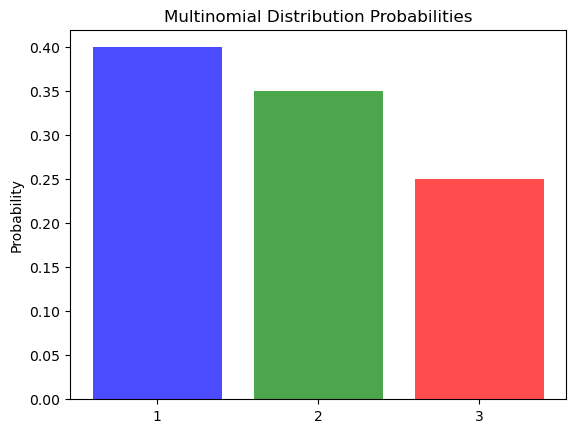

In [7]:
# Visualize multinomial distribution
categories = ['1', '2', '3']
plt.bar(categories, p_multinomial, color=['blue', 'green', 'red'], alpha=0.7)
plt.title('Multinomial Distribution Probabilities')
plt.ylabel('Probability')
plt.show()

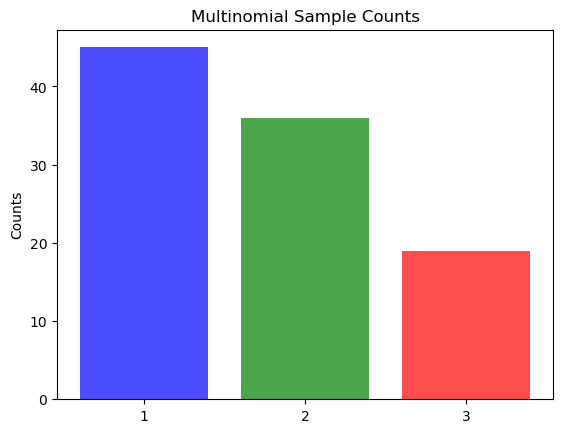

In [8]:
# Visualize the multinomial sample
plt.bar(categories, multinomial_sample[0], color=['blue', 'green', 'red'], alpha=0.7)
plt.title('Multinomial Sample Counts')
plt.ylabel('Counts')
plt.show()

In [9]:
# Visualize the Dirichlet prior using a ternary plot
p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

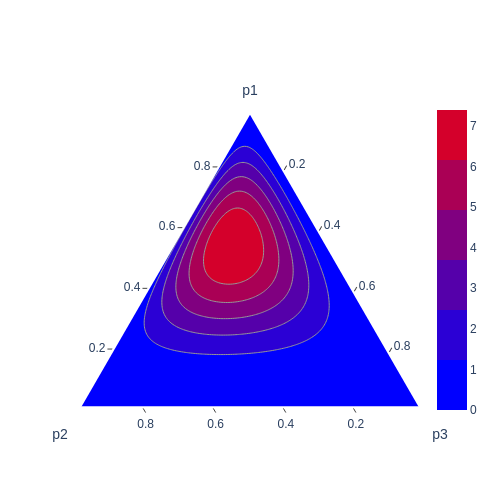

In [13]:
# Dirichlet prior ternary plot
alpha_prior = np.array([4, 2.5, 2])
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

fig = ff.create_ternary_contour(
    p.T, dirichlet_prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig.show("png")

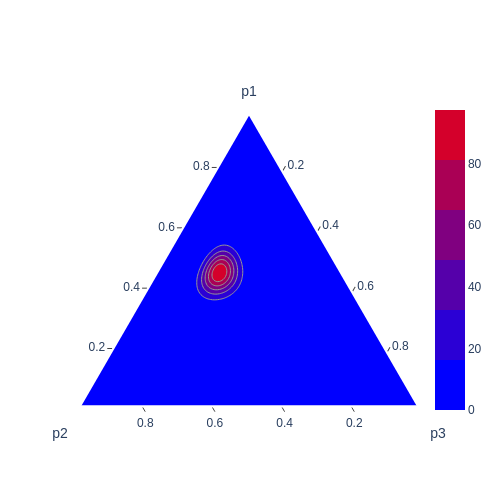

In [14]:
# Update posterior based on multinomial sample
alpha_posterior = alpha_prior + multinomial_sample[0]
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

fig = ff.create_ternary_contour(
    p.T, dirichlet_posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig.show("png")